In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
papers = pd.read_csv('/content/drive/MyDrive/DSBA 6211/federalist.csv')
papers
papers.shape

(85, 3)

In [5]:
papers['Author'].value_counts()

Author
HAMILTON                51
MADISON                 14
UNKNOWN                 12
JAY                      5
HAMILTON AND MADISON     3
Name: count, dtype: int64

In [6]:
papers = papers[papers['Author'].isin(['HAMILTON','MADISON','UNKNOWN'])]
papers['Author'].value_counts()

Author
HAMILTON    51
MADISON     14
UNKNOWN     12
Name: count, dtype: int64

In [7]:
papers = papers.sort_values(by=['Author'],ignore_index=True) # 0-50 HAMILTON; 51-64 MADISON; 65-77 UNKNOWN
papers

,ID,Author,Text
0,1,HAMILTON,To the People of the State of New York: AFTER ...
1,84,HAMILTON,To the People of the State of New York: IN THE...
2,59,HAMILTON,To the People of the State of New York: THE na...
3,60,HAMILTON,To the People of the State of New York: WE HAV...
4,61,HAMILTON,To the People of the State of New York: THE mo...
...,...,...,...
72,54,UNKNOWN,To the People of the State of New York: THE ne...
73,55,UNKNOWN,To the People of the State of New York: THE nu...
74,58,UNKNOWN,To the People of the State of New York: THE re...
75,56,UNKNOWN,To the People of the State of New York: THE SE...


In [8]:
papers['Text']=papers['Text'].str.replace('To the People of the State of New York:',"")
papers

,ID,Author,Text
0,1,HAMILTON,AFTER an unequivocal experience of the ineffi...
1,84,HAMILTON,IN THE course of the foregoing review of the ...
2,59,HAMILTON,THE natural order of the subject leads us to ...
3,60,HAMILTON,"WE HAVE seen, that an uncontrollable power ov..."
4,61,HAMILTON,THE more candid opposers of the provision res...
...,...,...,...
72,54,UNKNOWN,THE next view which I shall take of the House...
73,55,UNKNOWN,THE number of which the House of Representati...
74,58,UNKNOWN,THE remaining charge against the House of Rep...
75,56,UNKNOWN,THE SECOND charge against the House of Repres...


In [9]:
# Check dimension of the potential DTM
def dim():
    # Combine all texts into a single string, split into words, and convert to a set to count unique words
    dimensions = len(set(" ".join(papers['Text']).lower().split()))
    print(f'{dimensions} dimensions in the potential DFM.')

dim()

13629 dimensions in the potential DFM.


In [10]:
# 20 most common words - frequency
freq = pd.Series(' '.join(papers['Text']).split()).value_counts()[:20] # This is a slice operation that selects the first 20 items [strat, end, step]
freq

the      15197
of       10806
to        6345
and       4213
in        3831
a         3619
be        3567
that      2485
is        1872
which     1835
it        1624
by        1552
as        1465
would     1139
have      1132
will      1098
for       1090
or        1079
The       1079
not       1066
Name: count, dtype: int64

In [11]:
# data cleaning -- lower casing
papers['Text']=papers['Text'].str.lower()
freq = pd.Series(' '.join(papers['Text']).split()).value_counts()[:20]
freq

the      16423
of       10906
to        6478
and       4391
in        4132
a         3780
be        3577
that      2518
it        2091
is        1933
which     1846
by        1581
as        1560
this      1256
would     1160
have      1144
for       1118
will      1114
or        1093
not       1083
Name: count, dtype: int64

In [12]:
dim()

13629 dimensions in the potential DFM.


In [14]:
# data cleaning -- remove stop words (additional stop words)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

papers['Text']=papers['Text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))
freq = pd.Series(' '.join(papers['Text']).split()).value_counts()[:20]
freq

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


state           486
power           456
government      412
states          378
every           342
federal         298
national        296
great           270
states,         260
public          258
people          258
constitution    239
new             221
united          218
general         218
less            217
government,     197
without         192
authority       191
two             190
Name: count, dtype: int64

In [15]:
# additional stop words (any additional words want to remove)
stop +=['would','may','one','must','upon',
        'might','ought','shall','could']
papers['Text']=papers['Text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop)) # lambda is that it allows you to define simple functions inline without the need for a separate def statement.
dim()

13498 dimensions in the potential DFM.


In [16]:
# data cleaning -- remove punctations
papers['Text'] = papers['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [17]:
# data cleaning -- stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
papers['Text']=papers['Text'].apply(
    lambda x: " ".join([st.stem(word) for word in x.split()])
)
dim()

5022 dimensions in the potential DFM.


In [18]:
from wordcloud import WordCloud


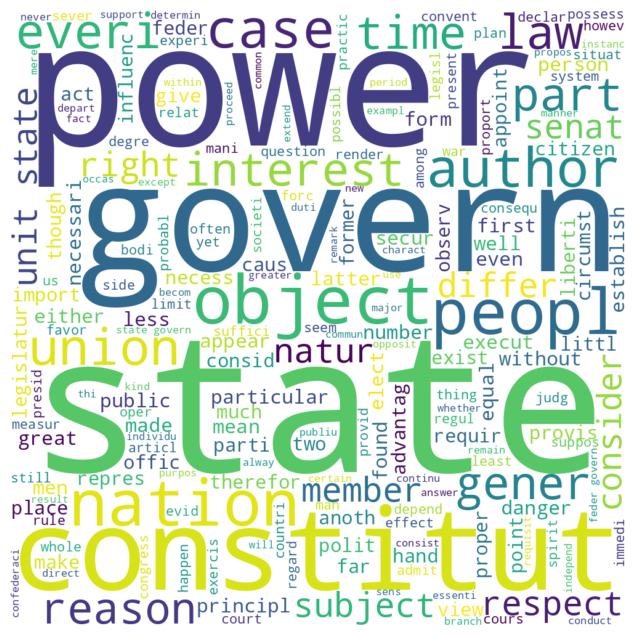

In [19]:
# word cloud

# Directly join the preprocessed text from the DataFrame
comment_words = ' '.join(papers['Text'])

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      width=1000,
                      height=1000).generate(comment_words)

# Display the generated word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [20]:
# build word dictionary and dtm
import gensim
from gensim import corpora

doc_complete = papers['Text']

corpus = [doc.split() for doc in doc_complete]

dictionary = corpora.Dictionary(corpus)

dictionary.filter_extremes(no_below=2, no_above=0.75)

DFM = [dictionary.doc2bow(doc) for doc in corpus]

print("Total number of documents:", len(DFM))
print("Total number of unique tokens:", len(dictionary))


Total number of documents: 77
Total number of unique tokens: 3311


[[1.0000005  0.3736063  0.23602033 ... 0.23231512 0.15432104 0.23541644]
 [0.3736063  0.9999988  0.30750248 ... 0.32384837 0.2944988  0.3335693 ]
 [0.23602033 0.30750248 0.9999996  ... 0.36193708 0.27385536 0.3546089 ]
 ...
 [0.23231512 0.32384837 0.36193708 ... 1.0000006  0.49794084 0.50680596]
 [0.15432104 0.2944988  0.27385536 ... 0.49794084 0.99999946 0.47985616]
 [0.23541644 0.3335693  0.3546089  ... 0.50680596 0.47985616 1.0000002 ]]
(77, 77)


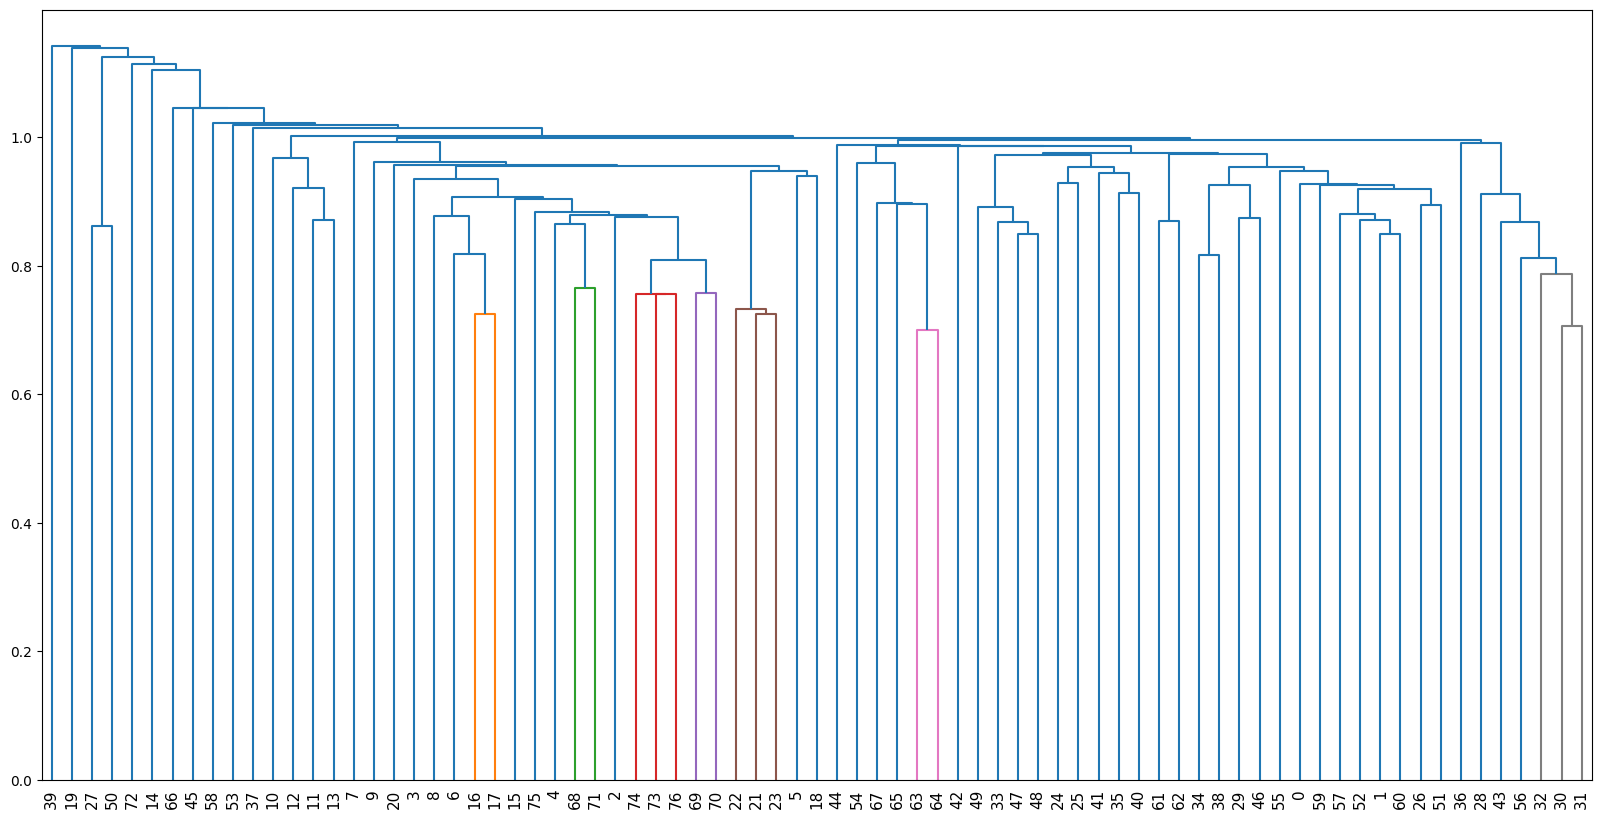

In [21]:
# similarity
from gensim.similarities import MatrixSimilarity
simil = MatrixSimilarity(DFM,num_features=len(dictionary))
distance = 1-simil[DFM]

print(simil[DFM])
print(simil[DFM].shape)
len(simil[DFM])

from scipy.cluster import hierarchy

Z = hierarchy.linkage(distance,'single')

plt.figure(figsize=(20,10))

# plot a dendrogram from a hierarchical clustering
dn = hierarchy.dendrogram(Z, orientation='top',
                          leaf_font_size='11',
                          labels=papers.index)

In [22]:
text_sim = pd.DataFrame(simil[DFM]) # similarity matrix
text_sim[71].sort_values(ascending=False)

71    1.000000
68    0.532404
75    0.501016
4     0.425789
69    0.422022
        ...   
27    0.158824
39    0.157933
50    0.128249
7     0.121401
22    0.114579
Name: 71, Length: 77, dtype: float32

In [23]:
from gensim.models import Word2Vec

corpus = [doc.split() for doc in papers['Text']]

model = Word2Vec(corpus,
                 min_count=20,
                 vector_size=40,
                 workers=3,
                 window=3,
                 sg=1)

model.wv.most_similar('state',topn=10)


[('sever', 0.8910261392593384),
 ('unit', 0.8855446577072144),
 ('congress', 0.8838679790496826),
 ('jurisdict', 0.8834125995635986),
 ('presid', 0.876190721988678),
 ('limit', 0.8675658106803894),
 ('suprem', 0.8658601641654968),
 ('except', 0.8635450005531311),
 ('declar', 0.863201379776001),
 ('impeach', 0.8624151945114136)]

In [24]:
# topic modeling
from gensim.models import LdaModel   # needed this line

n_topics = 8

ldamodel = gensim.models.LdaModel(DFM,    #needed gensim. before models
                           num_topics=n_topics,
                           id2word=dictionary,
                           random_state = 100,
                           passes=40)

# Print the top 10 terms for each of the 8 topics - optional
for topic_id in range(ldamodel.num_topics):
    print('Topic', topic_id)
    for term, probability in ldamodel.get_topic_terms(topic_id, topn=8):
        print('\t', ldamodel.id2word[term], probability)


Topic 0
	 armi 0.007610973
	 forc 0.006182899
	 liberti 0.0061707464
	 right 0.0059199343
	 member 0.0052052294
	 militari 0.0051537715
	 parti 0.0047376356
	 establish 0.004628059
Topic 1
	 senat 0.015457012
	 appoint 0.013118637
	 presid 0.012320706
	 offic 0.010137758
	 man 0.0068292012
	 governor 0.005920882
	 council 0.0052952687
	 nomin 0.005171345
Topic 2
	 philosoph 0.00606071
	 charter 0.0044764103
	 dwell 0.00447618
	 prepossess 0.004476096
	 advers 0.004102097
	 gain 0.003253376
	 passion 0.002805071
	 stronger 0.002743494
Topic 3
	 articl 0.009477316
	 congress 0.008702111
	 right 0.008108451
	 confeder 0.00802123
	 convent 0.007027145
	 establish 0.005619054
	 provis 0.0049042404
	 foreign 0.0048978324
Topic 4
	 revenu 0.004166245
	 countri 0.004104787
	 war 0.0040115044
	 situat 0.0037448963
	 commerc 0.0035655536
	 necess 0.0034807127
	 influenc 0.0034176758
	 confederaci 0.003376343
Topic 5
	 repres 0.019941866
	 elect 0.014843534
	 year 0.0062509635
	 member 0.00560679

In [25]:
pip install --upgrade pyLDAvis gensim joblib


In [31]:
# SVD              add gensim. before models
tfidf = gensim.models.TfidfModel(DFM)
DFM_tfidf = tfidf[DFM]

 #set n_SVD = 77 first

n_SVD=77
SVD_model = gensim.models.LsiModel(DFM_tfidf,
                            id2word=dictionary,
                            num_topics=n_SVD)
SVD = SVD_model[DFM_tfidf]

# singular values
singular_values = np.array(SVD_model.projection.s) # singular values
print(singular_values)


[3.1121561  1.59998531 1.49442554 1.3460045  1.30599568 1.24606062
 1.22809589 1.16890534 1.1449615  1.10052236 1.09373116 1.07907725
 1.06894392 1.05802813 1.04489179 1.04084595 1.0269263  1.01330518
 1.00947617 1.0038448  0.98772488 0.98587685 0.98309331 0.97585671
 0.97065613 0.9574434  0.95449211 0.95112767 0.94226639 0.93620568
 0.93157416 0.92942062 0.92775312 0.92128266 0.90927581 0.906342
 0.90395058 0.89660382 0.89424213 0.89174875 0.88991405 0.88039707
 0.8778297  0.87612007 0.86823239 0.86368754 0.85728844 0.85238524
 0.84888722 0.84525543 0.84135328 0.83703593 0.83535125 0.83116553
 0.82990756 0.8256748  0.81981889 0.8180775  0.81366135 0.801545
 0.79565395 0.79326927 0.78649953 0.77943051 0.77585807 0.7677078
 0.76465872 0.75904928 0.75412298 0.74472745 0.74061973 0.72818885
 0.72297953 0.70962059 0.69285475 0.67005372 0.47429387]


In [36]:
#added this code:
import pandas as pd

# Assuming SVD is a list of lists or similar, where each sub-list represents the SVD results for a document
svd_df = pd.DataFrame(SVD)

# Optionally, if you need to set column names to represent each SVD dimension
svd_df.columns = ['SVD_' + str(i) for i in range(1, n_SVD + 1)]

In [37]:
# concatenates a Pandas DataFrame svd_df with the 'Author' column
model_df = pd.concat([papers['Author'], svd_df], axis=1)
model_df

,Author,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,SVD_9,...,SVD_68,SVD_69,SVD_70,SVD_71,SVD_72,SVD_73,SVD_74,SVD_75,SVD_76,SVD_77
0,HAMILTON,"(0, 0.3238731293056718)","(1, 0.07070591036683638)","(2, -0.026675544039830416)","(3, 0.07535258242175007)","(4, -0.05932576858236206)","(5, 0.12499536096306225)","(6, -0.01839797907930742)","(7, 0.025844613768357987)","(8, -0.1730660169951494)",...,"(67, 0.033900798342983735)","(68, 0.015552742376672368)","(69, 0.06870867412937612)","(70, -0.0242393202681768)","(71, 0.016476195991881347)","(72, -0.02482706476902764)","(73, 0.02619232471413246)","(74, -0.0046341051228198735)","(75, 0.017324767240171523)","(76, -0.0004161290784106685)"
1,HAMILTON,"(0, 0.4128605635215551)","(1, -0.024876447507181335)","(2, -0.01349268543198625)","(3, -0.1609480326944221)","(4, 0.15961366715917474)","(5, -0.17289890561593807)","(6, 0.17581750181470976)","(7, -0.04239276963656322)","(8, -0.013706515589888616)",...,"(67, -0.024097609934443334)","(68, -0.13927170641929096)","(69, 0.03139157330921322)","(70, 0.07015712221429309)","(71, 0.06796834922623804)","(72, 0.07017772649582467)","(73, 0.002728326060565751)","(74, 0.0787992899398075)","(75, 0.038617106900457714)","(76, -0.0021684186568491494)"
2,HAMILTON,"(0, 0.3763700333222253)","(1, -0.05215656819124036)","(2, 0.18381134414777742)","(3, -0.032051797258043066)","(4, 0.04429278186724496)","(5, -0.07046770603910385)","(6, -0.02858244412453805)","(7, -0.04568300213563092)","(8, -0.21071177516178066)",...,"(67, -0.01579605904957916)","(68, 0.06706233462035575)","(69, 0.01734281317778493)","(70, 0.0023778718365695434)","(71, 0.05096602669788423)","(72, 0.015101118821520775)","(73, 0.06257863550623974)","(74, -0.018798039061933537)","(75, 0.00040527094550586067)","(76, -0.0020247209021811187)"
3,HAMILTON,"(0, 0.374142481621088)","(1, 0.03367921550265877)","(2, 0.12469269030044146)","(3, -0.1070610971050795)","(4, -0.10302000933263562)","(5, 0.012258708146942635)","(6, -0.2674169657087348)","(7, 0.019296172451208755)","(8, -0.13972855004603882)",...,"(67, 0.10277721403983196)","(68, 0.037855600267362954)","(69, 0.024425941021010398)","(70, 0.061906712341761476)","(71, -0.006545996339991517)","(72, 0.037778598142512866)","(73, 0.00754319060858299)","(74, -0.025882711020460556)","(75, 0.05400793607626073)","(76, 0.002728614139860177)"
4,HAMILTON,"(0, 0.3075193554616501)","(1, 0.01598076434445108)","(2, 0.17053214907205627)","(3, -0.03818773910373401)","(4, -0.19589444846773613)","(5, -0.24083131122112073)","(6, -0.05300918575562646)","(7, -0.025156666258815547)","(8, -0.14880352334805189)",...,"(67, 0.12238093555537714)","(68, -0.02021304450631912)","(69, 0.12695072854133246)","(70, 0.05223974652766062)","(71, -0.11278514228288974)","(72, -0.10875212464429031)","(73, -0.00852209579496189)","(74, -0.03993838662852017)","(75, -0.03416132061480436)","(76, -0.0069002392592524015)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,UNKNOWN,"(0, 0.23189774944117267)","(1, 0.049434003008131604)","(2, 0.0613452674237319)","(3, -0.1594976474642885)","(4, -0.15419966695528642)","(5, 0.0002706758896022978)","(6, -0.0777039194081434)","(7, -0.12907899087635025)","(8, -0.047466684654312905)",...,"(67, -0.0483612296078971)","(68, 0.04674145336128744)","(69, 0.04746991234634779)","(70, -0.04470805492274669)","(71, -0.054373604303249154)","(72, -0.08134478035932217)","(73, 0.011437101146588469)","(74, -0.02859462256212585)","(75, -0.028947961792617972)","(76, 0.0053108292592267065)"
73,UNKNOWN,"(0, 0.3408072229231452)","(1, 0.04025580598838437)","(2, 0.20775805399437455)","(3, -0.02976727491361064)","(4, -0.2765658950211314)","(5, -0.31046393538609807)","(6, 0.04207765512154663)","(7, -0.015292456387654767)","(8, 0.029645155426386998)",...,"(67, 0.10309047763125996)","(68, -0.05077029160436389)","(69, 0.1302707267963114)","(70, 0.06341624974872102)","(71, -0.2624120203425315)","(72, 0.005683250509573335)","(73, 0.028142571392399965)",

In [44]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Assuming 'model_df' is your DataFrame and is already defined
# Partitioning the dataset
testData = model_df[model_df['Author'] == 'UNKNOWN']
trainData = model_df[model_df['Author'] != 'UNKNOWN']

# Separating features and target variable
y_train = trainData['Author']
x_train = trainData.drop(columns=['Author'])  # Drop 'Author' column to get features
x_test = testData.drop(columns=['Author'])    # Drop 'Author' column to get features

# Preprocess data: Convert non-scalar values to scalar by taking the mean of tuples/lists
for column in x_train.columns:
    x_train[column] = x_train[column].apply(lambda x: np.mean(x) if isinstance(x, (list, tuple)) else x)
    x_test[column] = x_test[column].apply(lambda x: np.mean(x) if isinstance(x, (list, tuple)) else x)

# Initialize and train the decision tree classifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

# Make predictions on the test set
tree_predictions = tree.predict(x_test)
print(tree_predictions)  # Printing predictions

# Evaluate the model's performance on the training data
training_accuracy = tree.score(x_train, y_train)
print("Training Accuracy:", training_accuracy)


['HAMILTON' 'HAMILTON' 'HAMILTON' 'HAMILTON' 'HAMILTON' 'HAMILTON'
 'HAMILTON' 'HAMILTON' 'HAMILTON' 'HAMILTON' 'MADISON' 'HAMILTON']
Training Accuracy: 1.0
